In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RESULTS_FOLDER = "../../data/input_cost_analysis"
FIGURE_FOLDER = "../../figures"

In [3]:
# read all the results
df = pd.DataFrame()
for filename in os.listdir(RESULTS_FOLDER):
    input_cost = float(filename.split('=')[1][:-4])
    full_filename = f"{RESULTS_FOLDER}/{filename}"
    df_i = pd.read_csv(full_filename)
    df_i["input_cost"] = input_cost
    df = df.append(df_i, ignore_index=True)
df = df.drop("Unnamed: 0", axis=1)

In [4]:
model_names = {
    "hill_climbing": "Hill-Climbing",
    "sparse_lqr": "Sparse LQR",
    "sparse_max_discrete": "Sparse Hill-Climbing (discrete)",
    "sparse_max_continuous": "Sparse Hill-Climbing (continuous)",
    "null_model_1": "Null Model 1",
    "null_model_2": "Null Model 2"
}

In [5]:
def make_model_line_plot(model_type, df=df):
    """
    Produce a line plot of performance as a function of input cost
    """
    df_model = df[df["model"] == model_type]
    df_model = df_model.sort_values(by="input_cost").reset_index()
    x_vals = df_model["input_cost"].drop_duplicates()
    y_vals = df_model.groupby("input_cost")["performance"].median()
    y_errs = df_model.groupby("input_cost")["performance"].quantile(0.625) - df_model.groupby("input_cost")["performance"].quantile(0.365)
    
    fig, ax = plt.subplots()
    ax.plot(x_vals, y_vals)
    ax.set_ylim(0, 700)
    ax.set_xscale("log")
    ax.set_xlabel("input cost")
    ax.set_ylabel("performance")
    ax.set_title(f"Performance by Input Cost: {model_names[model_type]}")
    
    return fig, ax

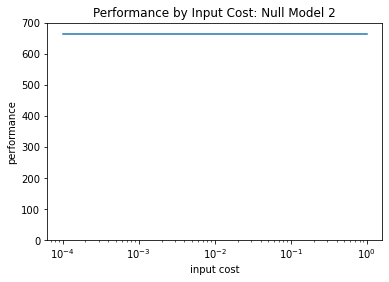

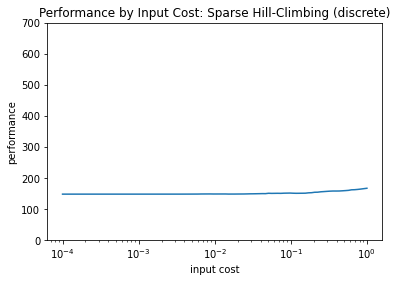

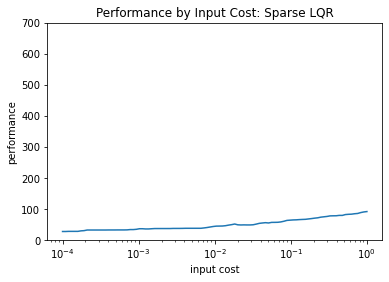

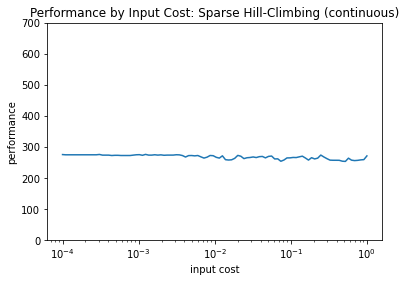

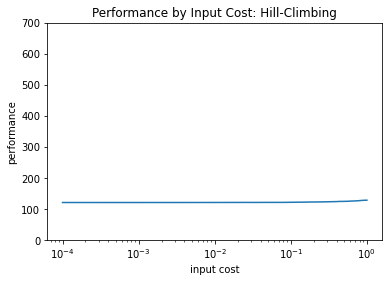

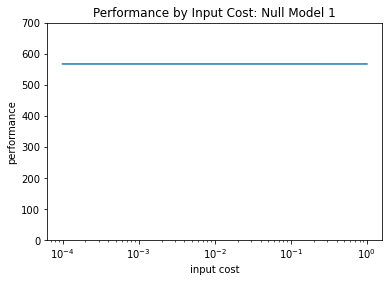

In [6]:
# Create all the figures and save them in files
for model_type in df["model"].drop_duplicates():
    fig, ax = make_model_line_plot(model_type)
    fig.savefig(f"{FIGURE_FOLDER}/input_cost_{model_type}.pdf")

In [15]:
for model_type in df["model"].drop_duplicates():
    for i in df["input_cost"].drop_duplicates():
        print(model_type, i, df[(df["model"] == model_type) & (df["input_cost"] == i)]["performance"].mean())

null_model_2 0.0001 740.4919180260536
null_model_2 0.00010974987654930556 740.4919180260536
null_model_2 0.00012045035402587823 740.4919180260536
null_model_2 0.00013219411484660288 740.4919180260536
null_model_2 0.000145082877849594 740.4919180260536
null_model_2 0.00015922827933410923 740.4919180260536
null_model_2 0.0001747528400007683 740.4919180260536
null_model_2 0.00019179102616724886 740.4919180260536
null_model_2 0.00021049041445120198 740.4919180260536
null_model_2 0.00023101297000831605 740.4919180260536
null_model_2 0.00025353644939701115 740.4919180260536
null_model_2 0.0002782559402207126 740.4919180260536
null_model_2 0.0003053855508833416 740.4919180260536
null_model_2 0.0003351602650938841 740.4919180260536
null_model_2 0.0003678379771828634 740.4919180260536
null_model_2 0.0004037017258596554 740.4919180260536
null_model_2 0.0004430621457583882 740.4919180260536
null_model_2 0.00048626015800653534 740.4919180260536
null_model_2 0.0005336699231206312 740.4919180260536
